In [2]:
import sys
import os
sys.path.append("../")

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from matplotlib import cm
from netCDF4 import Dataset, MFDataset
import pyfesom as pf

In [2]:
basedir = '/work/ollie/orichter/MisomipPlus/'
meshpath  = basedir+'fesommesh/iceOceanC/1005/'
mesh = pf.fesom_mesh(meshpath, abg=[0,0,0],cavity=False)

filepath = os.path.join(basedir,'fesomdata','iceOceanF','iceOceanC.1008.oce.nc')
fl = Dataset(filepath)

Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds


In [34]:
mesh.n32.shape

(6272, 37)

In [32]:
np.where(mesh.n32==f)

(array([303]), array([1]))

In [20]:
t,f = np.where(fl['u']==np.max(fl['u']))

For depth 0 model level -0.0 will be used


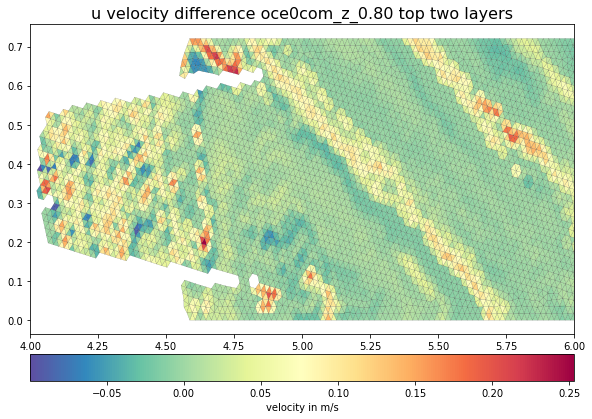

In [3]:
data, elem_no_nan = pf.get_data(fl['u'][-1,:],mesh,0)

plt.figure(figsize=(8.27,6))

data = data#*360*24*3600
plt.tripcolor(mesh.x2, mesh.y2, elem_no_nan, \
              data, \
              edgecolors='k',\
              lw = 0.1,
             cmap=cm.Spectral_r)
cbar = plt.colorbar(orientation='horizontal', pad=0.05,cmap='bwr');
cbar.set_label("velocity in m/s")
plt.title('u velocity difference oce0com_z_0.80 top two layers',size=16)
plt.tight_layout()
plt.xlim(4.0,6.0)
#plt.savefig("/work/ollie/orichter/MisomipPlus/reports/figures/iceOceanG_melt_"+year_out+".png")
plt.show()